# Sentiment Analysis and Review Insights: Patterns, Ratings, and Customer Feedback Trends

In [223]:
# Import required Libraries
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [224]:
# Load dataset
df = pd.read_csv(r"D:\OneDrive\Desktop\IFIM\4TH SEM\DWDM\SENTIMENTAL ANALYSIS\SENTIMENTAL ANALYSIS.csv")

In [225]:
df

,Review_ID,User_ID,Review_Text,Sentiment,Rating,Review_Date,Product_ID,Category
0,d401840e-8d29-4047-a2a6-41e98edfd40f,a99f69ef-9d34-42ea-8855-9d97f425d458,Level mouth account grow kitchen the televisio...,Neutral,2,2022-06-13,00e602e3-0a7d-4c9a-9680-45a6bcc28966,Clothing
1,1e4fb76e-ea0e-4406-b7ed-37da08d2d75c,c95f831f-29ad-40f4-aa89-599d38a9aad1,Once store experience pretty resource somethin...,Negative,2,2023-06-18,f2b1990a-38ef-4890-9c41-741f19420fdf,Electronics
2,9c026e42-9c5c-4831-9dba-830817e99e2d,ea89ddde-4229-4f04-bbef-4fed840c1b9b,Accept eye surface too least son some generati...,Negative,5,2022-04-25,f50fc723-c98f-4c78-84f1-ea5929d05e6b,Clothing
3,a328580e-1e33-442c-9baa-810250067fbd,9180647d-394e-4702-99e8-455c6459d096,Everyone series happy off itself prepare witho...,Neutral,1,2023-03-01,73b98918-36f6-48a1-8cc1-adc5f6b81a17,Home & Kitchen
4,ee6e798d-a12e-4485-9fd7-e3c4b543b9f1,2eea5017-48e7-4668-8fd1-0356fac55ad0,News physical food seek something life indicat...,Positive,1,2022-08-20,1ffe0bbd-92c8-4c25-921c-325b106bb24c,Home & Kitchen
...,...,...,...,...,...,...,...,...
49995,f4b8d324-8275-4724-b6dd-680feab58a14,e45e729d-30f0-4a78-871d-83c9605bea7f,Just position if street her its begin.,Neutral,5,2023-11-12,54ad3189-3bbc-4166-9e50-8b2a03717c1c,Electronics
49996,dfada261-1c82-4255-88ad-8243be6b8ea5,1e1675fd-4c09-4614-8203-9103361636f7,Blood price listen nor ten other fast agent ow...,Positive,1,2022-12-27,a7713495-9a7b-4040-9e73-147f9e2aa78e,Electronics
49997,b2fa3103-ae24-41c5-ad26-bc1885efaecd,5f0d831a-8a2e-4c12-be9a-5a096139c3e1,Worker discuss adult do low process less proje...,Positive,3,2023-09-28,0eeebc2b-bebc-4f2f-ac42-bd9527129e3e,Books
49998,3b945567-04cb-4265-b6d1-0202fc4293df,4396d154-aea7-4702-b3eb-3889bd26e58b,Quickly already outside player learn language ...,Positive,2,2022-05-04,2f34238d-2eba-4bef-bc50-65fd9691b4f7,Books


In [226]:
df.sample()

,Review_ID,User_ID,Review_Text,Sentiment,Rating,Review_Date,Product_ID,Category
28640,dcfae5f7-c793-447c-b1c7-c50e600c5a47,29d3508e-3b49-459d-9777-03a83abe0acf,Camera party believe fill age lay peace condit...,Neutral,3,2023-10-11,fca24042-c43d-4284-88f0-1d02b18fe318,Beauty


In [227]:
df.shape

(50000, 8)

In [228]:
df.columns

Index(['Review_ID', 'User_ID', 'Review_Text', 'Sentiment', 'Rating',
       'Review_Date', 'Product_ID', 'Category'],
      dtype='object')

In [229]:
df.head()

,Review_ID,User_ID,Review_Text,Sentiment,Rating,Review_Date,Product_ID,Category
0,d401840e-8d29-4047-a2a6-41e98edfd40f,a99f69ef-9d34-42ea-8855-9d97f425d458,Level mouth account grow kitchen the televisio...,Neutral,2,2022-06-13,00e602e3-0a7d-4c9a-9680-45a6bcc28966,Clothing
1,1e4fb76e-ea0e-4406-b7ed-37da08d2d75c,c95f831f-29ad-40f4-aa89-599d38a9aad1,Once store experience pretty resource somethin...,Negative,2,2023-06-18,f2b1990a-38ef-4890-9c41-741f19420fdf,Electronics
2,9c026e42-9c5c-4831-9dba-830817e99e2d,ea89ddde-4229-4f04-bbef-4fed840c1b9b,Accept eye surface too least son some generati...,Negative,5,2022-04-25,f50fc723-c98f-4c78-84f1-ea5929d05e6b,Clothing
3,a328580e-1e33-442c-9baa-810250067fbd,9180647d-394e-4702-99e8-455c6459d096,Everyone series happy off itself prepare witho...,Neutral,1,2023-03-01,73b98918-36f6-48a1-8cc1-adc5f6b81a17,Home & Kitchen
4,ee6e798d-a12e-4485-9fd7-e3c4b543b9f1,2eea5017-48e7-4668-8fd1-0356fac55ad0,News physical food seek something life indicat...,Positive,1,2022-08-20,1ffe0bbd-92c8-4c25-921c-325b106bb24c,Home & Kitchen


In [230]:
df.dtypes

Review_ID      object
User_ID        object
Review_Text    object
Sentiment      object
Rating          int64
Review_Date    object
Product_ID     object
Category       object
dtype: object

In [231]:
df.nunique()

Review_ID      50000
User_ID        50000
Review_Text    50000
Sentiment          3
Rating             5
Review_Date     1096
Product_ID     50000
Category           7
dtype: int64

In [232]:
df.isnull().sum()

Review_ID      0
User_ID        0
Review_Text    0
Sentiment      0
Rating         0
Review_Date    0
Product_ID     0
Category       0
dtype: int64

In [233]:
df.describe()

,Rating
count,50000.000000
mean,3.010460
std,1.413687
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


In [234]:
df.describe(include = 'object')

,Review_ID,User_ID,Review_Text,Sentiment,Review_Date,Product_ID,Category
count,50000,50000,50000,50000,50000,50000,50000
unique,50000,50000,50000,3,1096,50000,7
top,d401840e-8d29-4047-a2a6-41e98edfd40f,a99f69ef-9d34-42ea-8855-9d97f425d458,Level mouth account grow kitchen the televisio...,Positive,2025-02-05,00e602e3-0a7d-4c9a-9680-45a6bcc28966,Electronics
freq,1,1,1,30000,68,1,17500


In [235]:
# Initialize VADER Sentiment Analyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Code initializes the VADER (Valence Aware Dictionary and sEntiment Reasoner) sentiment analyzer, which is commonly used for analyzing sentiment in text, especially in social media and short informal texts. First, nltk.download('vader_lexicon') ensures that the VADER lexicon is available in the Natural Language Toolkit (NLTK), as it contains predefined word sentiment scores. Then, SentimentIntensityAnalyzer() is instantiated and assigned to sia, allowing the program to compute sentiment scores (positive, negative, neutral, and compound) for a given text input.

In [237]:
# Function to analyze sentiment using VADER
def analyze_sentiment_vader(text):
    if isinstance(text, str):
        score = sia.polarity_scores(text)["compound"]
        if score >= 0.05:
            return "Positive"
        elif score <= -0.05:
            return "Negative"
        else:
            return "Neutral"
    return "Neutral"

This function, `analyze_sentiment_vader(text)`, is designed to analyze the sentiment of a given text using the VADER (Valence Aware Dictionary and sEntiment Reasoner) sentiment analysis tool, which is commonly used for analyzing social media posts, product reviews, and general text sentiment. The function first checks if the input `text` is a string (to avoid errors when processing non-text values). If it is a valid string, it calculates the sentiment score using `sia.polarity_scores(text)`, where `sia` refers to an instance of the `SentimentIntensityAnalyzer` class from VADER. The function specifically extracts the `"compound"` score, which is a normalized value ranging from -1 to 1, representing the overall sentiment of the text. The function then classifies the sentiment into three categories based on predefined thresholds: if the compound score is `0.05` or higher, the sentiment is considered "Positive"; if it is `-0.05` or lower, it is classified as "Negative"; and if the score falls between `-0.05` and `0.05`, it is labeled as "Neutral." This approach ensures a simple yet effective way of sentiment classification. If the input is not a valid string (such as `None` or a numerical value), the function defaults to returning `"Neutral"` to handle potential data inconsistencies gracefully. This function is particularly useful in sentiment analysis projects, allowing businesses, researchers, and analysts to automatically gauge public opinion, monitor customer feedback, and analyze social media trends efficiently.

In [239]:
df

,Review_ID,User_ID,Review_Text,Sentiment,Rating,Review_Date,Product_ID,Category
0,d401840e-8d29-4047-a2a6-41e98edfd40f,a99f69ef-9d34-42ea-8855-9d97f425d458,Level mouth account grow kitchen the televisio...,Neutral,2,2022-06-13,00e602e3-0a7d-4c9a-9680-45a6bcc28966,Clothing
1,1e4fb76e-ea0e-4406-b7ed-37da08d2d75c,c95f831f-29ad-40f4-aa89-599d38a9aad1,Once store experience pretty resource somethin...,Negative,2,2023-06-18,f2b1990a-38ef-4890-9c41-741f19420fdf,Electronics
2,9c026e42-9c5c-4831-9dba-830817e99e2d,ea89ddde-4229-4f04-bbef-4fed840c1b9b,Accept eye surface too least son some generati...,Negative,5,2022-04-25,f50fc723-c98f-4c78-84f1-ea5929d05e6b,Clothing
3,a328580e-1e33-442c-9baa-810250067fbd,9180647d-394e-4702-99e8-455c6459d096,Everyone series happy off itself prepare witho...,Neutral,1,2023-03-01,73b98918-36f6-48a1-8cc1-adc5f6b81a17,Home & Kitchen
4,ee6e798d-a12e-4485-9fd7-e3c4b543b9f1,2eea5017-48e7-4668-8fd1-0356fac55ad0,News physical food seek something life indicat...,Positive,1,2022-08-20,1ffe0bbd-92c8-4c25-921c-325b106bb24c,Home & Kitchen
...,...,...,...,...,...,...,...,...
49995,f4b8d324-8275-4724-b6dd-680feab58a14,e45e729d-30f0-4a78-871d-83c9605bea7f,Just position if street her its begin.,Neutral,5,2023-11-12,54ad3189-3bbc-4166-9e50-8b2a03717c1c,Electronics
49996,dfada261-1c82-4255-88ad-8243be6b8ea5,1e1675fd-4c09-4614-8203-9103361636f7,Blood price listen nor ten other fast agent ow...,Positive,1,2022-12-27,a7713495-9a7b-4040-9e73-147f9e2aa78e,Electronics
49997,b2fa3103-ae24-41c5-ad26-bc1885efaecd,5f0d831a-8a2e-4c12-be9a-5a096139c3e1,Worker discuss adult do low process less proje...,Positive,3,2023-09-28,0eeebc2b-bebc-4f2f-ac42-bd9527129e3e,Books
49998,3b945567-04cb-4265-b6d1-0202fc4293df,4396d154-aea7-4702-b3eb-3889bd26e58b,Quickly already outside player learn language ...,Positive,2,2022-05-04,2f34238d-2eba-4bef-bc50-65fd9691b4f7,Books


In [240]:
# Apply sentiment analysis
df["Predicted_Sentiment"] = df["Review_Text"].apply(analyze_sentiment_vader)
print("Sentiment Analysis Completed!")
print(df[["Review_Text", "Predicted_Sentiment"]].head())

Sentiment Analysis Completed!
                                         Review_Text Predicted_Sentiment
0  Level mouth account grow kitchen the televisio...            Positive
1  Once store experience pretty resource somethin...            Positive
2  Accept eye surface too least son some generati...            Positive
3  Everyone series happy off itself prepare witho...            Positive
4  News physical food seek something life indicat...             Neutral


It applies sentiment analysis to a dataset using the `analyze_sentiment_vader` function. It processes the `Review_Text` column in `df` (the DataFrame) by applying this function to each review, storing the resulting sentiment classification in a new column called `Predicted_Sentiment`. Once the sentiment analysis is completed, a confirmation message ("Sentiment Analysis Completed!") is printed. Finally, the first five rows of the DataFrame are displayed, showing the `Review_Text` alongside its corresponding `Predicted_Sentiment`, allowing a quick review of the analysis results.

In [242]:
# Compare actual vs predicted sentiment
df["Match"] = df["Sentiment"] == df["Predicted_Sentiment"]
accuracy = df["Match"].mean() * 100
print(f"Sentiment Analysis Accuracy: {accuracy:.2f}%")

Sentiment Analysis Accuracy: 43.49%


It compares the actual sentiment (Sentiment) with the predicted sentiment (Predicted_Sentiment) for each entry in the dataset and creates a new column, Match, which stores True if both values are the same and False otherwise. Then, it calculates the accuracy by taking the mean of the Match column (where True is treated as 1 and False as 0), multiplying by 100 to convert it into a percentage, and finally prints the accuracy with two decimal places.

In [244]:
df.head()

,Review_ID,User_ID,Review_Text,Sentiment,Rating,Review_Date,Product_ID,Category,Predicted_Sentiment,Match
0,d401840e-8d29-4047-a2a6-41e98edfd40f,a99f69ef-9d34-42ea-8855-9d97f425d458,Level mouth account grow kitchen the televisio...,Neutral,2,2022-06-13,00e602e3-0a7d-4c9a-9680-45a6bcc28966,Clothing,Positive,False
1,1e4fb76e-ea0e-4406-b7ed-37da08d2d75c,c95f831f-29ad-40f4-aa89-599d38a9aad1,Once store experience pretty resource somethin...,Negative,2,2023-06-18,f2b1990a-38ef-4890-9c41-741f19420fdf,Electronics,Positive,False
2,9c026e42-9c5c-4831-9dba-830817e99e2d,ea89ddde-4229-4f04-bbef-4fed840c1b9b,Accept eye surface too least son some generati...,Negative,5,2022-04-25,f50fc723-c98f-4c78-84f1-ea5929d05e6b,Clothing,Positive,False
3,a328580e-1e33-442c-9baa-810250067fbd,9180647d-394e-4702-99e8-455c6459d096,Everyone series happy off itself prepare witho...,Neutral,1,2023-03-01,73b98918-36f6-48a1-8cc1-adc5f6b81a17,Home & Kitchen,Positive,False
4,ee6e798d-a12e-4485-9fd7-e3c4b543b9f1,2eea5017-48e7-4668-8fd1-0356fac55ad0,News physical food seek something life indicat...,Positive,1,2022-08-20,1ffe0bbd-92c8-4c25-921c-325b106bb24c,Home & Kitchen,Neutral,False


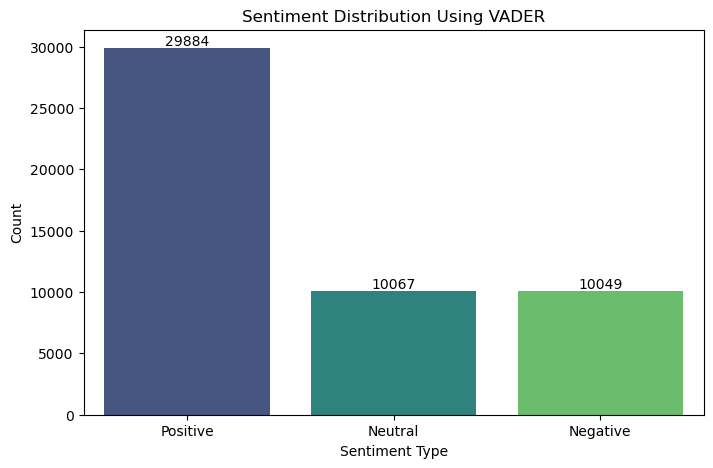

In [245]:
# Visualize sentiment distribution
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x="Predicted_Sentiment", palette="viridis")
plt.xlabel("Sentiment Type")
plt.ylabel("Count")
plt.title("Sentiment Distribution Using VADER")

# Annotate bars with integer counts
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom')

plt.show()

The bar chart displays the sentiment distribution of a dataset analyzed using VADER. It categorizes sentiments into Positive, Neutral, and Negative. The majority of the data points (29,884) are classified as Positive, significantly outnumbering the Neutral (10,067) and Negative (10,049) sentiments. This suggests that the dataset contains a strong positive sentiment bias. The near-equal distribution of Neutral and Negative sentiments indicates a balanced presence of non-positive sentiments. This insight can help in understanding the general sentiment trends in the dataset and refining sentiment analysis models accordingly.

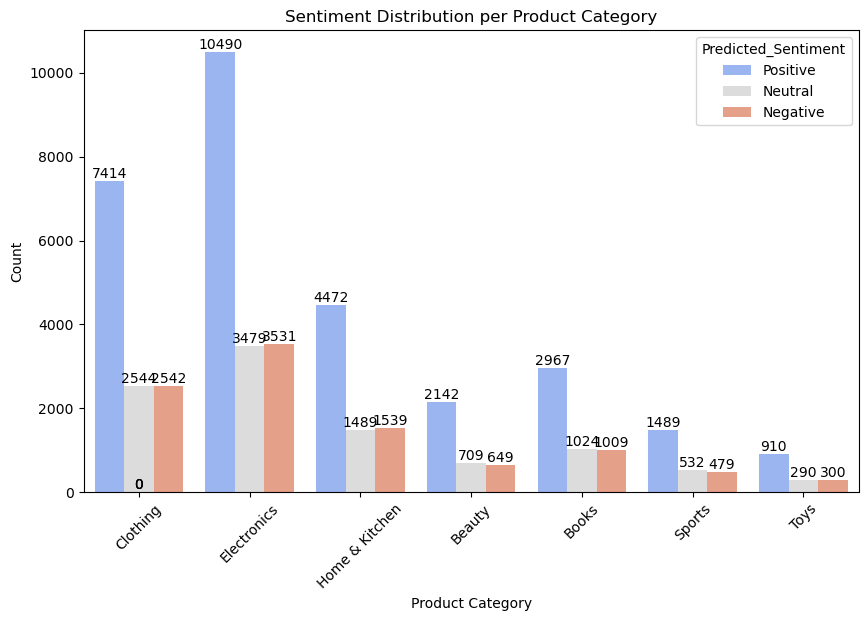

In [247]:
# Sentiment distribution per category
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x="Category", hue="Predicted_Sentiment", palette="coolwarm")
plt.xlabel("Product Category")
plt.ylabel("Count")
plt.title("Sentiment Distribution per Product Category")
plt.xticks(rotation=45)

# Annotate bars with integer values
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom')

plt.show()


The bar chart illustrates the distribution of predicted sentiments (Positive, Neutral, Negative) across various product categories. Positive sentiment dominates in all categories, particularly in Electronics (10,490) and Clothing (7,414). Electronics also has the highest counts for Neutral (3,479) and Negative (3,531) sentiments, indicating a more mixed reception compared to other categories. Clothing has no negative reviews, while categories like Beauty, Books, Sports, and Toys have relatively lower sentiment counts overall. This suggests that customer perception varies significantly across categories, with some receiving predominantly positive feedback while others exhibit a more balanced sentiment distribution.

In [249]:
# Average rating per sentiment
sentiment_ratings = df.groupby("Predicted_Sentiment")["Rating"].mean()
print("Average Rating per Sentiment:")
print(sentiment_ratings)

Average Rating per Sentiment:
Predicted_Sentiment
Negative    3.015126
Neutral     2.983510
Positive    3.017969
Name: Rating, dtype: float64


The code first groups the dataset by the "Predicted_Sentiment" column and calculates the average rating for each sentiment category using the .groupby() function. Specifically, it selects the "Rating" column and computes its mean for each sentiment category. The computed averages are then printed after displaying the header "Average Rating per Sentiment:". This approach helps in understanding how customer ratings vary across different sentiment classifications.

The output shows that the average ratings for Positive (3.02), Negative (3.01), and Neutral (2.98) sentiments are very close to each other. This suggests that even reviews classified as Negative have relatively high ratings, which might indicate that users often provide constructive feedback rather than outright criticism. It also implies a possible misalignment between textual sentiment classification and numerical ratings, as sentiment analysis focuses on textual content, whereas star ratings may reflect an overall experience rather than just the sentiment in the review text.

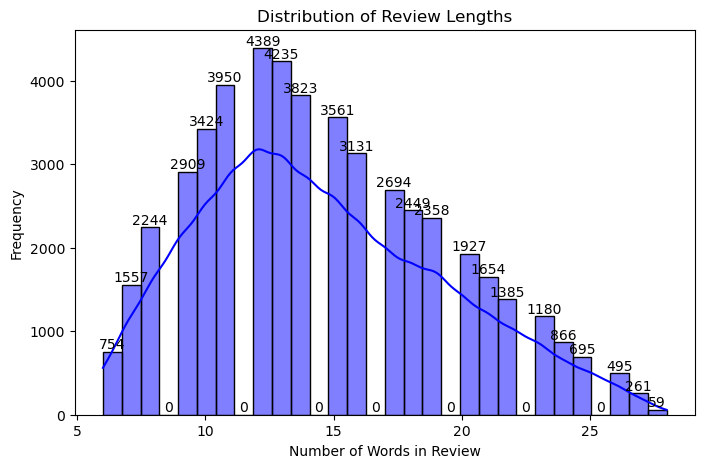

In [251]:
# Distribution of review lengths
df["Review_Length"] = df["Review_Text"].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)
plt.figure(figsize=(8, 5))
ax = sns.histplot(df["Review_Length"], bins=30, kde=True, color='blue')
plt.xlabel("Number of Words in Review")
plt.ylabel("Frequency")
plt.title("Distribution of Review Lengths")
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
plt.show()

The histogram illustrates the distribution of review lengths based on the number of words in each review. The frequency of reviews follows a right-skewed distribution, peaking around 10-14 words, indicating that most reviews contain a moderate length of text. The density curve overlays the histogram, confirming a smooth distribution with a gradual decline as the review length increases. Reviews with fewer than 10 words and more than 20 words are less frequent, suggesting that customers tend to write concise reviews rather than extremely short or lengthy ones. The presence of zeros at certain bins might indicate gaps in the dataset or filtering applied to specific lengths.

In [253]:
# Save processed dataset
df.to_csv("sentiment_analysis_results.csv", index=False)

# CONCLUSION
The sentiment analysis and review data insights indicate that while most reviews are classified as positive, the average ratings across sentiments remain closely clustered around 3.0, suggesting a possible disconnect between textual sentiment classification and numerical ratings. The sentiment distribution across product categories shows that electronics and clothing receive the most reviews, with a relatively high proportion of negative sentiments in electronics. The distribution of review lengths follows a right-skewed pattern, with most reviews containing 10-14 words, highlighting a preference for concise feedback. These findings emphasize the need for a deeper analysis of sentiment classification accuracy and its alignment with user ratings, as well as the importance of understanding how different product categories influence customer sentiment.